In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!kaggle datasets download grassknoted/asl-alphabet

 99% 1.02G/1.03G [00:09<00:00, 69.0MB/s]
100% 1.03G/1.03G [00:09<00:00, 110MB/s] 


In [ ]:
!unzip asl-alphabet.zip

Streaming output truncated to the last 5000 lines.
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating: asl_alphabet_tr

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm
from IPython.display import Image, display

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import itertools

In [ ]:
train_path = '/content/asl_alphabet_train/asl_alphabet_train'
test_path = '/content/asl_alphabet_test/asl_alphabet_test'

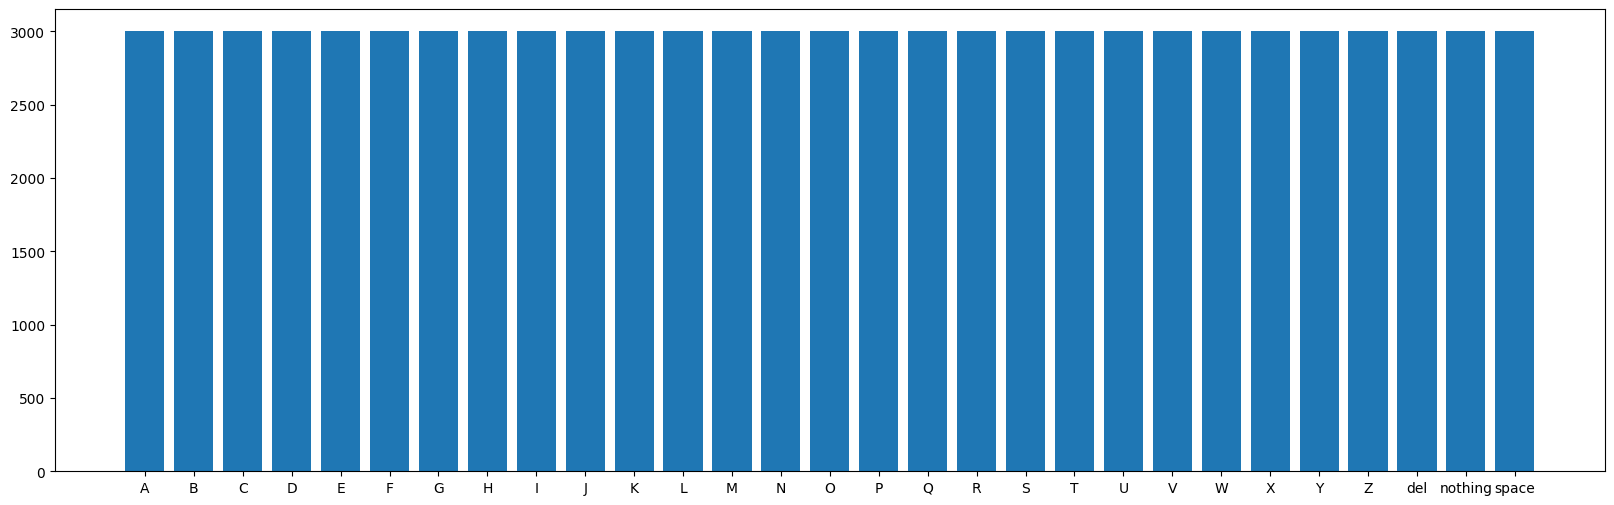

In [ ]:
classes = sorted(os.listdir(train_path))
numbers = []

for i in classes:
  numbers.append(len(os.listdir(train_path + '/' + i)))
  
plt.figure(figsize = (20,6))
plt.bar(classes, numbers)
plt.show()

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']

A


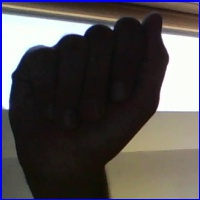

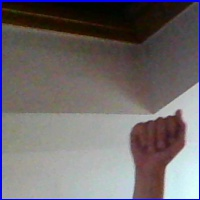

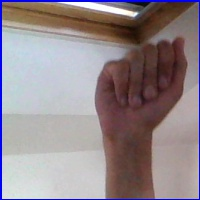

There are 3000 images in A class.

B


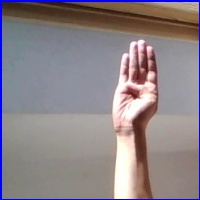

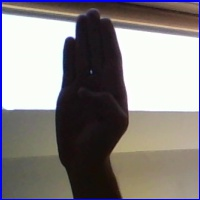

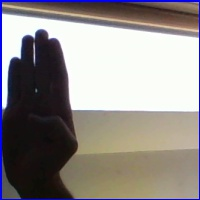

There are 3000 images in B class.

C


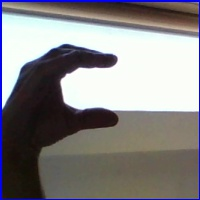

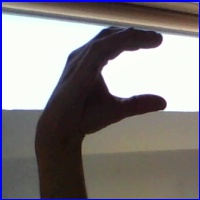

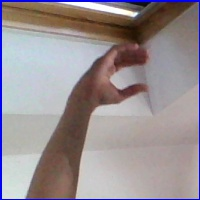

There are 3000 images in C class.

D


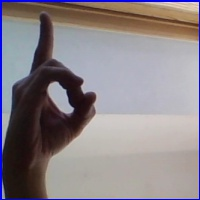

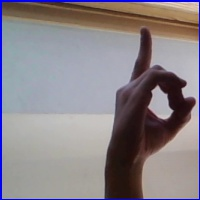

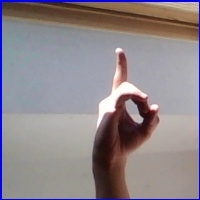

There are 3000 images in D class.

E


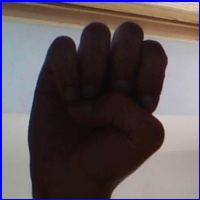

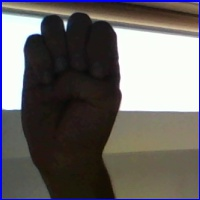

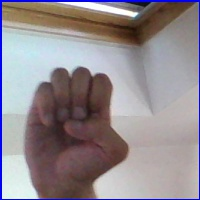

There are 3000 images in E class.

F


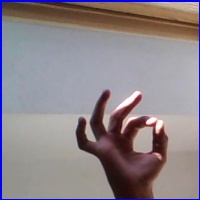

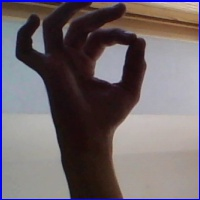

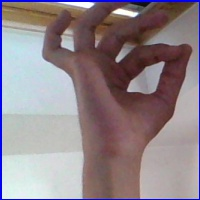

There are 3000 images in F class.

G


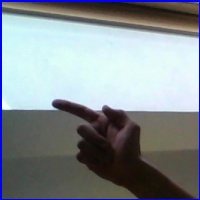

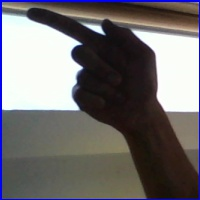

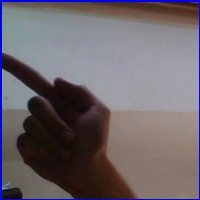

There are 3000 images in G class.

H


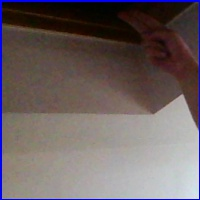

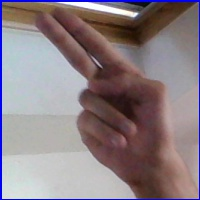

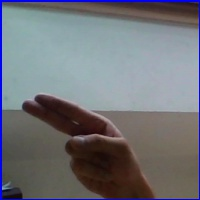

There are 3000 images in H class.

I


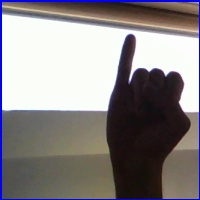

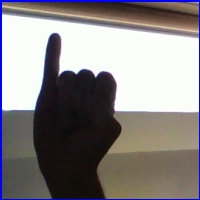

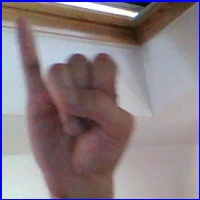

There are 3000 images in I class.

J


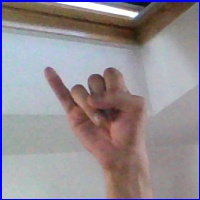

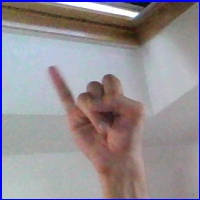

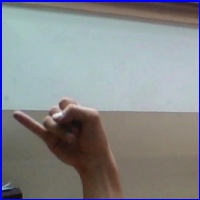

There are 3000 images in J class.

K


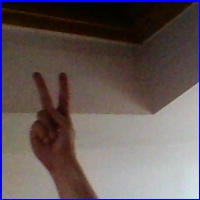

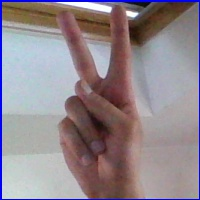

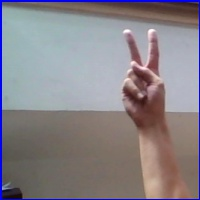

There are 3000 images in K class.

L


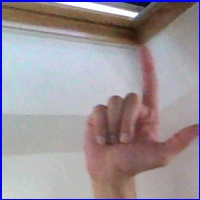

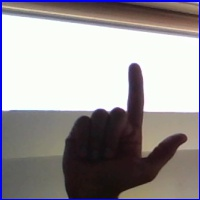

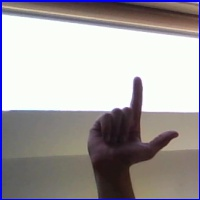

There are 3000 images in L class.

M


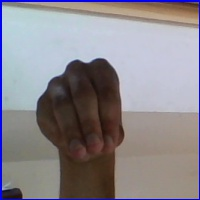

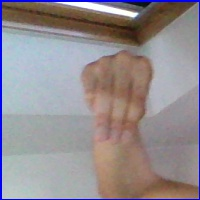

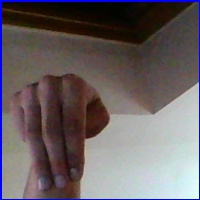

There are 3000 images in M class.

N


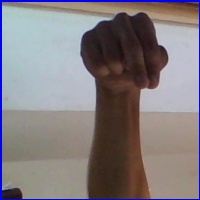

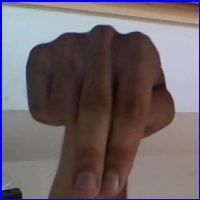

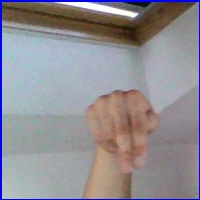

There are 3000 images in N class.

O


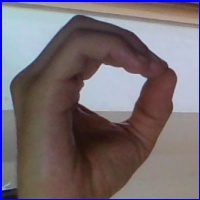

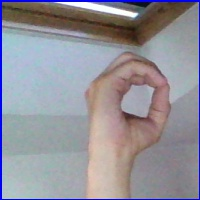

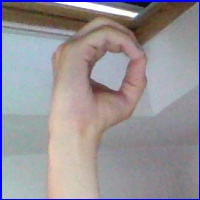

There are 3000 images in O class.

P


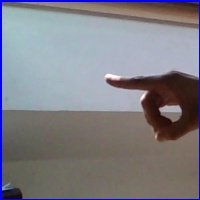

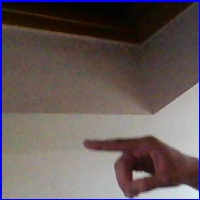

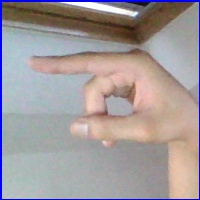

There are 3000 images in P class.

Q


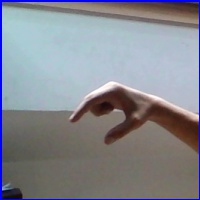

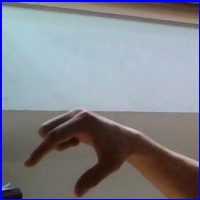

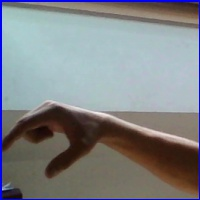

There are 3000 images in Q class.

R


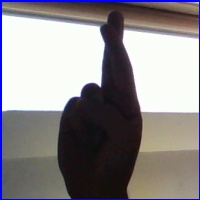

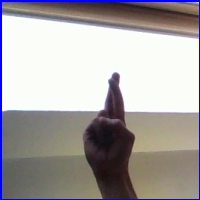

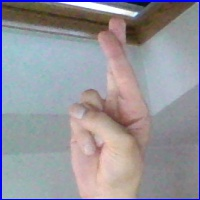

There are 3000 images in R class.

S


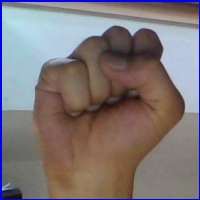

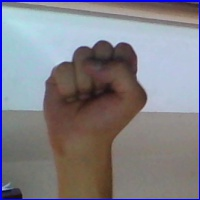

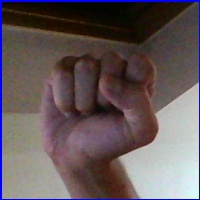

There are 3000 images in S class.

T


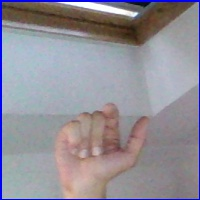

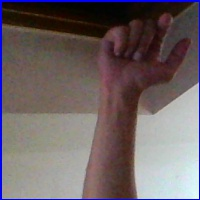

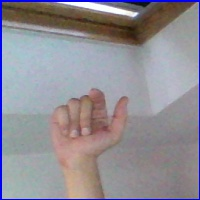

There are 3000 images in T class.

U


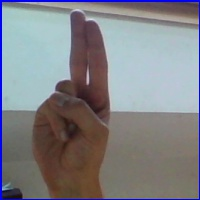

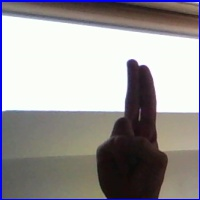

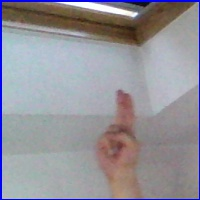

There are 3000 images in U class.

V


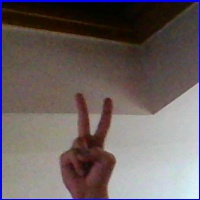

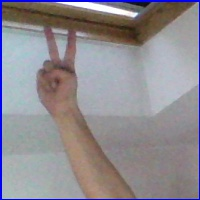

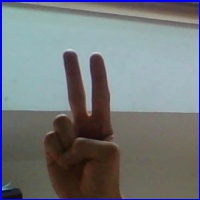

There are 3000 images in V class.

W


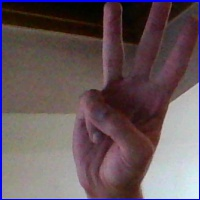

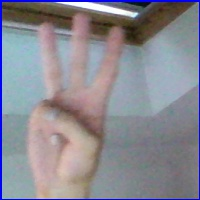

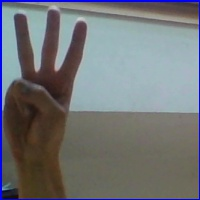

There are 3000 images in W class.

X


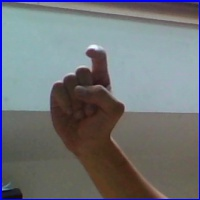

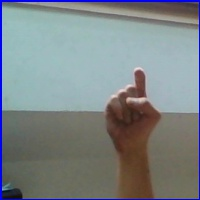

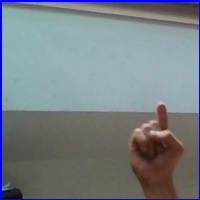

There are 3000 images in X class.

Y


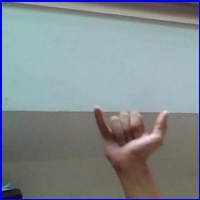

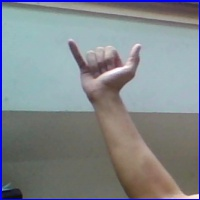

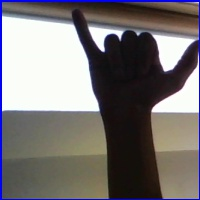

There are 3000 images in Y class.

Z


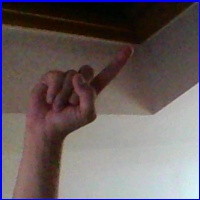

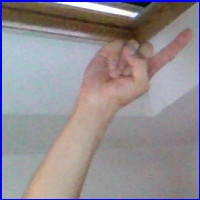

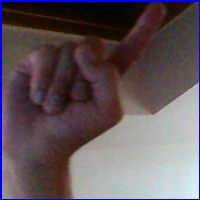

There are 3000 images in Z class.

del


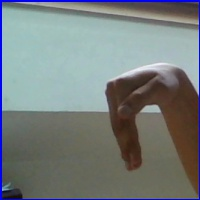

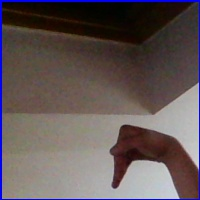

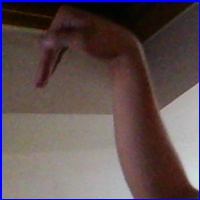

There are 3000 images in del class.

nothing


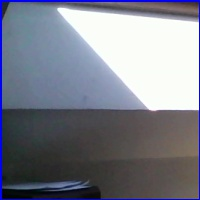

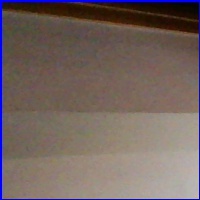

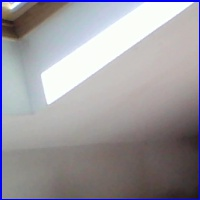

There are 3000 images in nothing class.

space


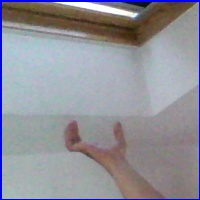

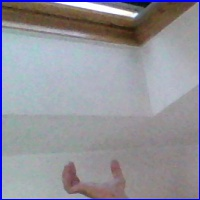

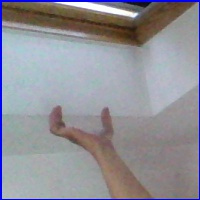

There are 3000 images in space class.


In [ ]:
labels = sorted(os.listdir(train_path))
print(labels)

for i in labels:
  path = train_path + '/' + i
  folder_data = os.listdir(path)
  k = 0
  print("")
  print(i)
  for image_path in folder_data:
    if k < 3:
      display(Image(path + '/' + image_path))
    k += 1
  print('There are', k, 'images in', i, 'class.')

In [ ]:
labels = sorted(os.listdir(train_path))
print(labels)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


In [ ]:
# trainsize = 3000

training_data=[]
def create_training_data():
    for category in labels:
        # k = 0
        path = os.path.join(train_path, category)
        class_num=labels.index(category)
        for img in os.listdir(path):
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(32,32))
                training_data.append([new_array,class_num])
                # k += 1
                # if k >= trainsize:
                #   break

create_training_data()      

In [ ]:
print(len(training_data))

87000


In [ ]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(len(training_data),-1)

In [ ]:
X.shape

(87000, 3072)

In [ ]:
X = X/255.0

In [ ]:
y=np.array(y)

In [ ]:
y.shape

(87000,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
ylr = lr.predict(X_test)

In [ ]:
print("Accuracy is",accuracy_score(y_test, ylr))

Accuracy is 0.5553103448275862


In [ ]:
print(classification_report(y_test,ylr))

              precision    recall  f1-score   support

           0       0.48      0.54      0.51       739
           1       0.51      0.58      0.54       716
           2       0.64      0.61      0.63       772
           3       0.53      0.45      0.49       727
           4       0.53      0.43      0.47       728
           5       0.58      0.48      0.52       737
           6       0.56      0.55      0.56       739
           7       0.62      0.62      0.62       744
           8       0.62      0.66      0.64       749
           9       0.57      0.59      0.58       742
          10       0.60      0.66      0.63       760
          11       0.71      0.68      0.69       788
          12       0.46      0.47      0.46       802
          13       0.63      0.55      0.59       783
          14       0.55      0.60      0.58       744
          15       0.65      0.70      0.67       705
          16       0.67      0.80      0.73       717
          17       0.55    

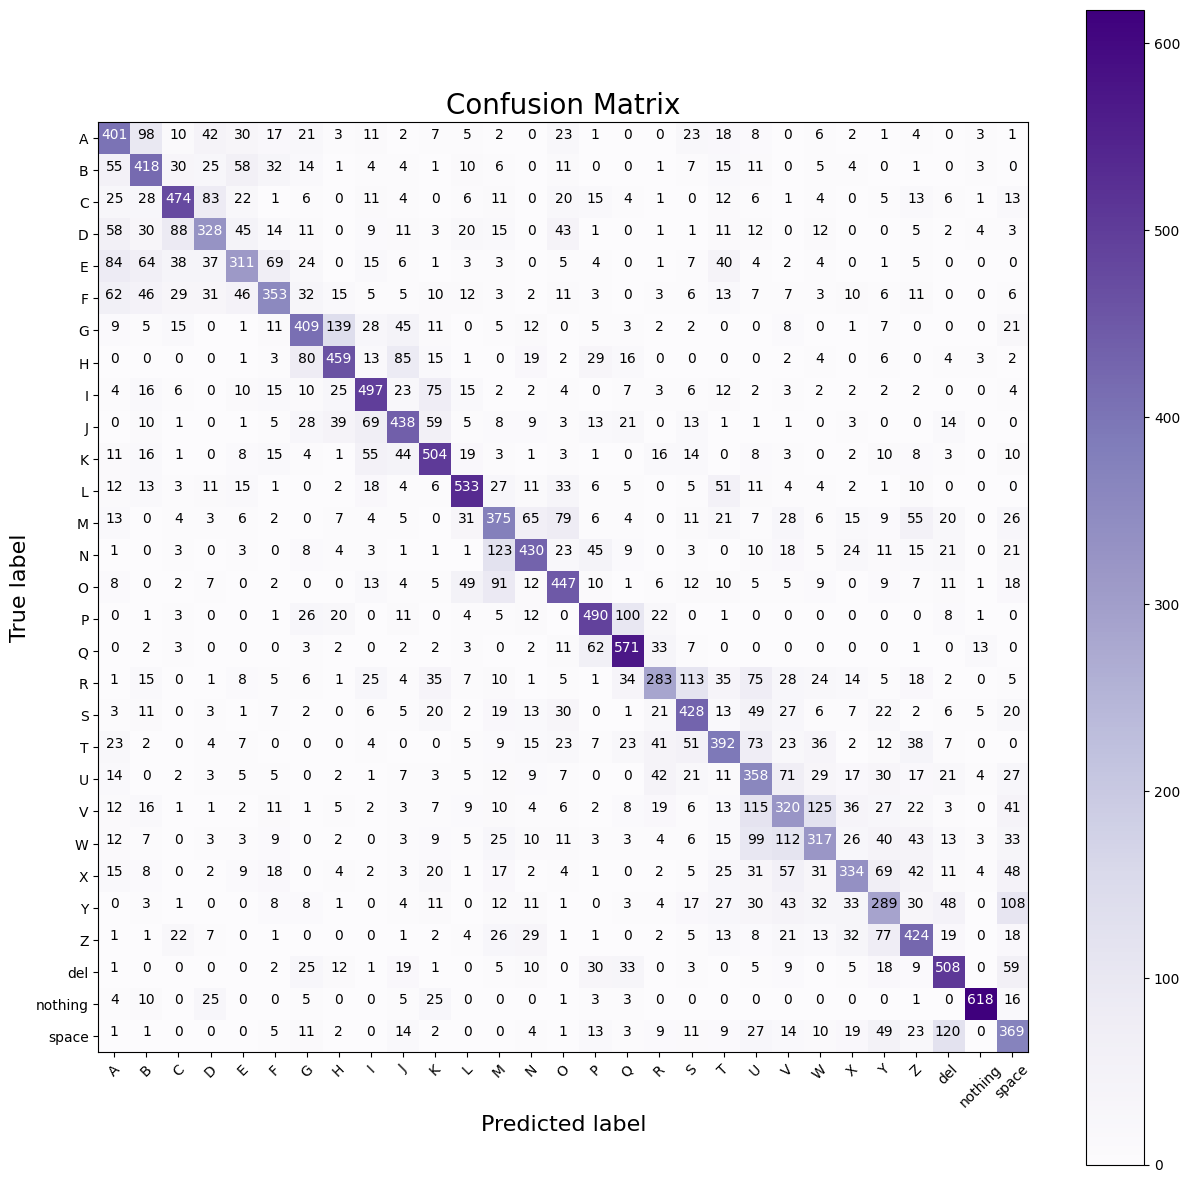

In [ ]:
def plot_confusion_matrix(y, y_pred):
  cm = confusion_matrix(y, y_pred)
  plt.figure(figsize = (15, 15))
  ax = plt.subplot()
  plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
  plt.colorbar()
  plt.title("Confusion Matrix")
  tick_marks = np.arange(len(labels))
  plt.xticks(tick_marks, labels, rotation=45)
  plt.yticks(tick_marks, labels)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ax.title.set_fontsize(20)
  ax.xaxis.label.set_fontsize(16)
  ax.yaxis.label.set_fontsize(16)
  limit = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
  plt.show()

plot_confusion_matrix(y_test, ylr)

In [ ]:
params_rand= {'penalty': ['l1', 'l2'], 'C': [0.1, 1]}



grid_search_lr = GridSearchCV(LogisticRegression(), param_grid=params_rand, refit=True, verbose=3, scoring="accuracy", n_jobs=-1)

grid_search_lr.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver lb

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1], 'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [ ]:
ylrgrid = grid_search_lr.predict(X_test)

In [ ]:
print("Accuracy is",accuracy_score(y_test, ylrgrid))

Accuracy is 0.5492413793103448


In [ ]:
print(classification_report(y_test,ylrgrid))

              precision    recall  f1-score   support

           0       0.49      0.54      0.51       739
           1       0.46      0.54      0.50       716
           2       0.55      0.65      0.59       772
           3       0.55      0.41      0.47       727
           4       0.49      0.45      0.47       728
           5       0.66      0.47      0.55       737
           6       0.54      0.58      0.56       739
           7       0.60      0.62      0.61       744
           8       0.59      0.67      0.63       749
           9       0.57      0.56      0.56       742
          10       0.68      0.61      0.64       760
          11       0.70      0.67      0.68       788
          12       0.52      0.41      0.46       802
          13       0.59      0.58      0.58       783
          14       0.56      0.64      0.60       744
          15       0.65      0.68      0.66       705
          16       0.68      0.77      0.73       717
          17       0.49    

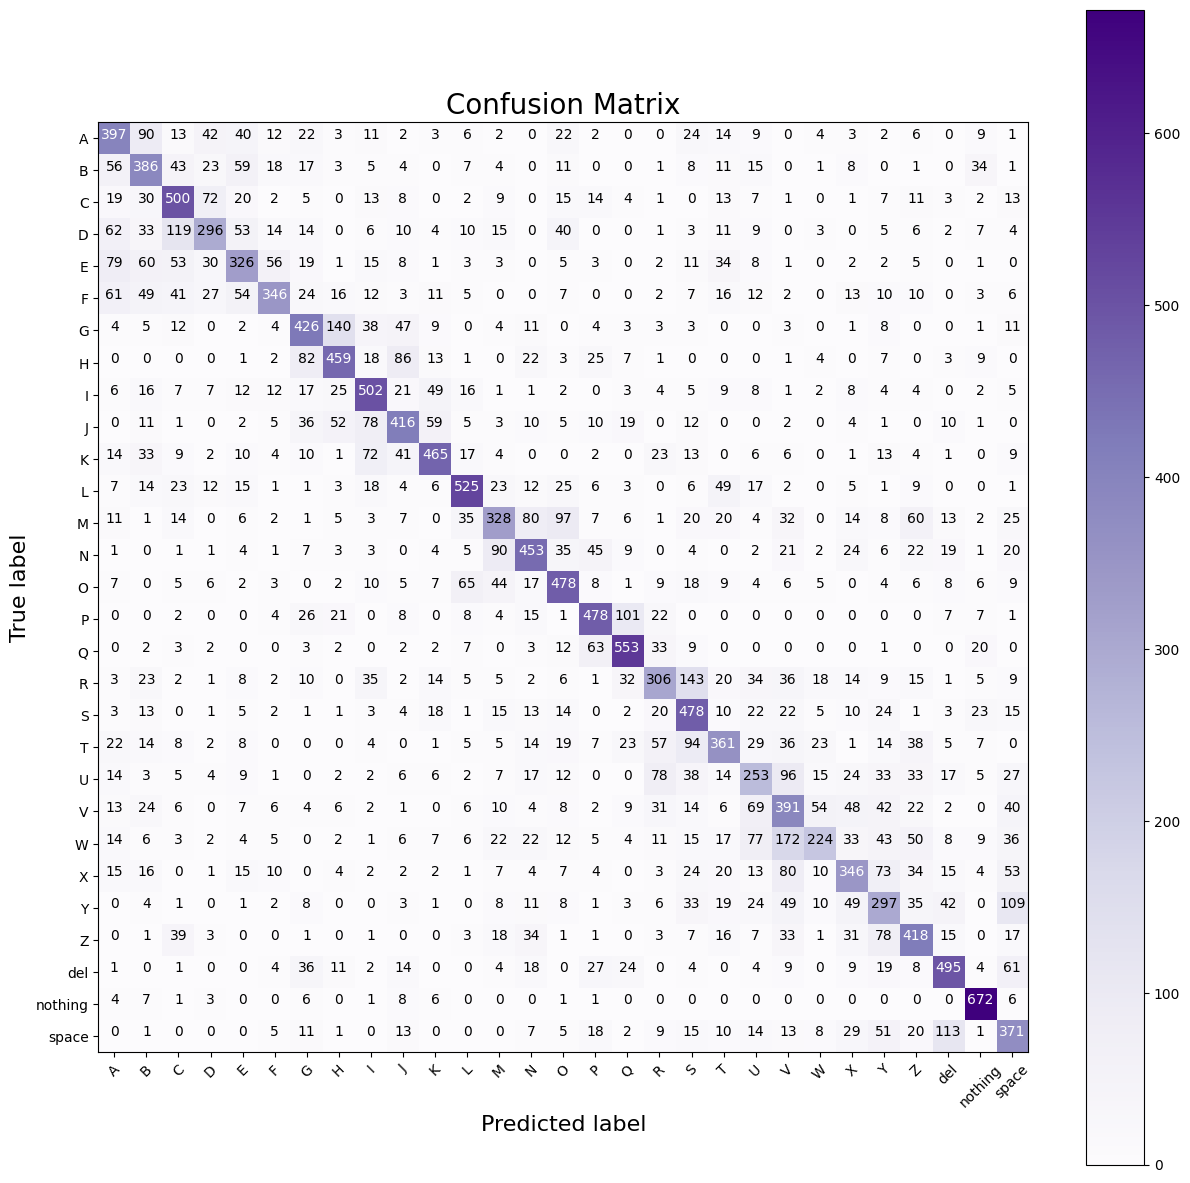

In [ ]:
def plot_confusion_matrix(y, y_pred):
  cm = confusion_matrix(y, y_pred)
  plt.figure(figsize = (15, 15))
  ax = plt.subplot()
  plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
  plt.colorbar()
  plt.title("Confusion Matrix")
  tick_marks = np.arange(len(labels))
  plt.xticks(tick_marks, labels, rotation=45)
  plt.yticks(tick_marks, labels)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ax.title.set_fontsize(20)
  ax.xaxis.label.set_fontsize(16)
  ax.yaxis.label.set_fontsize(16)
  limit = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
  plt.show()

plot_confusion_matrix(y_test, ylrgrid)

In [ ]:
print(grid_search_lr.best_params_)

{'C': 0.1, 'penalty': 'l2'}


In [ ]:
results = pd.DataFrame(grid_search_lr.cv_results_)
results = results.sort_values(by='rank_test_score').head(10)
best_params = results[['params', 'mean_test_score']]

print(best_params)

                        params  mean_test_score
1  {'C': 0.1, 'penalty': 'l2'}         0.549241
3    {'C': 1, 'penalty': 'l2'}         0.546023
0  {'C': 0.1, 'penalty': 'l1'}              NaN
2    {'C': 1, 'penalty': 'l1'}              NaN
